# Exploratory Data Analysis (EDA)

In [ ]:
# Importing necessary libraries

In [ ]:
import pandas as pd  # Importing pandas library for data manipulation

In [ ]:
import numpy as np  # Importing numpy library for numerical operations

In [ ]:
import matplotlib.pyplot as plt  # Importing matplotlib library for data visualization

In [ ]:
from statsmodels.tsa.stattools import adfuller  # Importing adfuller from statsmodels for stationarity check

In [ ]:
from statsmodels.tsa.arima.model import ARIMA  # Importing ARIMA model from statsmodels for time series forecasting

In [ ]:
from sklearn.metrics import mean_squared_error  # Importing mean_squared_error from sklearn for model evaluation

In [ ]:
import warnings  # Importing warnings library to handle warnings

In [ ]:
warnings.filterwarnings("ignore")  # Suppressing warnings

In [ ]:
# Load the Dataset

In [ ]:
# Assuming the dataset is stored in a file named 'household_power_consumption.txt'

In [ ]:
df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])  # Reading the dataset into a pandas DataFrame


In [ ]:
# Data Cleaning and Preprocessing

In [ ]:
# Replace '?' with NaN and convert data to float

In [ ]:
df.replace('?', np.nan, inplace=True)  # Replacing '?' with NaN in the dataset

In [ ]:
df = df.astype(float)  # Converting data to float type

In [ ]:
# Fill missing values with forward fill

In [ ]:
df.fillna(method='ffill', inplace=True)  # Filling missing values using forward fill

In [ ]:
# Resample data to daily frequency, summing up the total daily energy consumption

In [ ]:
daily_data = df.resample('D').sum()  # Resampling data to daily frequency and summing up the total daily energy consumption


In [ ]:
# Initial Data Exploration

In [ ]:
# Check the first few rows

In [ ]:
print("First few rows of the dataset:")
print(daily_data.head())  # Printing the first few rows of the dataset

First few rows of the dataset:
            Global_active_power  Global_reactive_power    Voltage  \
datetime                                                            
2006-12-16             1209.176                 34.922   93552.53   
2006-12-17             3390.460                226.006  345725.32   
2006-12-18             2203.826                161.792  347373.64   
2006-12-19             1666.194                150.942  348479.01   
2006-12-20             2225.748                160.998  348923.61   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
datetime                                                                      
2006-12-16            5180.8             0.0           546.0          4926.0  
2006-12-17           14398.6          2033.0          4187.0         13341.0  
2006-12-18            9247.2          1063.0          2621.0         14018.0  
2006-12-19            7094.0           839.0          7602.0          6197.0  
2006-12-20 

In [ ]:
# Summary statistics

In [ ]:
print("\nSummary statistics of the dataset:")
print(daily_data.describe())  # Printing summary statistics of the dataset


Summary statistics of the dataset:
       Global_active_power  Global_reactive_power        Voltage  \
count           919.000000             919.000000     919.000000   
mean           1607.719887             167.451088  345644.250664   
std             646.619554              45.082545   11211.821282   
min             207.402000              34.922000   93552.530000   
25%            1191.696000             132.886000  345190.985000   
50%            1588.912000             161.806000  346449.930000   
75%            1956.163000             190.402000  347819.225000   
max            4773.386000             392.272000  354298.520000   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count        919.000000      919.000000      919.000000      919.000000  
mean        6824.753428     1696.212187     2027.538629     8828.705114  
std         2685.400820     1643.951922     2220.651476     3596.086928  
min          886.600000        0.000000        0.000000

In [ ]:
# Check for missing values

In [ ]:
print("\nMissing values in the dataset:")
print(daily_data.isnull().sum())  # Printing the count of missing values in the dataset


Missing values in the dataset:
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [ ]:
# Visualizing the Data

In [ ]:
# Time series plot

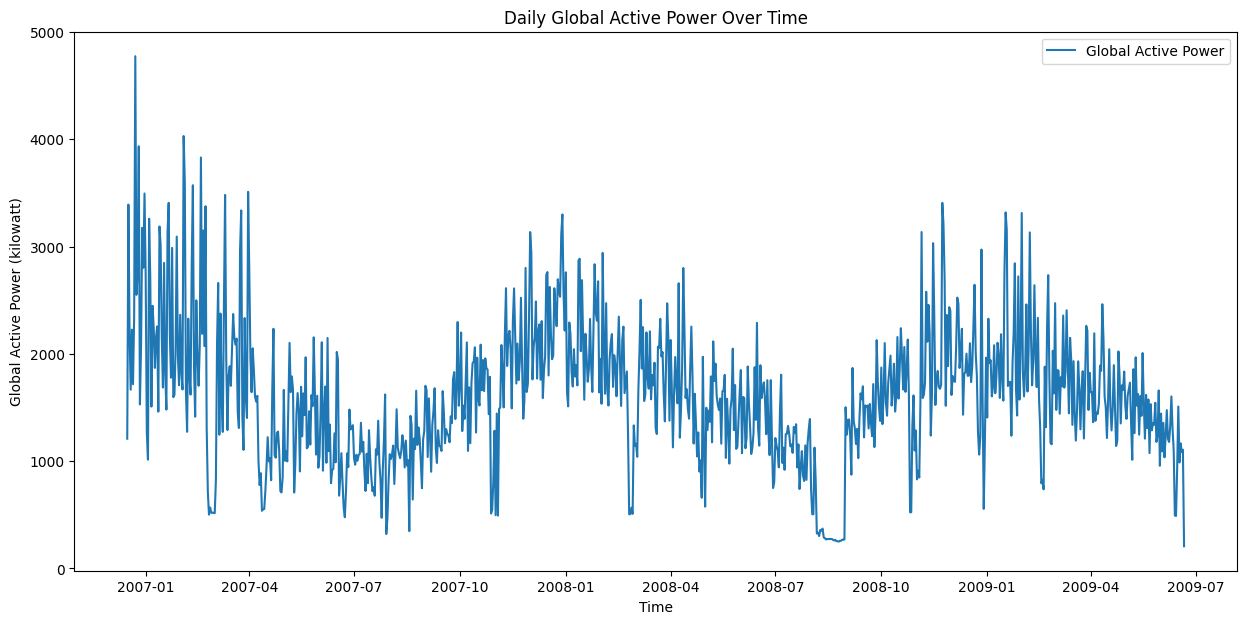

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(daily_data.index, daily_data['Global_active_power'], label='Global Active Power')
plt.title('Daily Global Active Power Over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatt)')
plt.legend()
plt.show()  # Plotting the time series data

# Stationarity Check

In [ ]:
# Perform Augmented Dickey-Fuller test

In [ ]:
adf_test = adfuller(daily_data['Global_active_power'])  # Performing Augmented Dickey-Fuller test
print('\nADF Statistic:', adf_test[0])  # Printing ADF Statistic
print('p-value:', adf_test[1])  # Printing p-value
if adf_test[1] > 0.05:
    print("The series is not stationary and will require differencing.")  # Providing interpretation based on p-value


ADF Statistic: -2.870444740707385
p-value: 0.048894400479772095


# ARIMA Model

In [ ]:
# Split the Data

In [ ]:
# Define a train-test split

In [ ]:
train_end = int(len(daily_data) * 0.8)  # Defining the end index for training data

In [ ]:
train_data = daily_data[:train_end]  # Splitting data into training set

In [ ]:
test_data = daily_data[train_end:]  # Splitting data into test set

In [ ]:
# Model Selection

In [ ]:
# Fit an ARIMA model (the order (p,d,q) needs to be determined)

In [ ]:
# For simplicity, we'll start with (1,1,1)

In [ ]:
arima_model = ARIMA(train_data['Global_active_power'], order=(1,1,1))  # Creating ARIMA model with order (1,1,1)


In [ ]:
arima_result = arima_model.fit()  # Fitting ARIMA model to the training data

In [ ]:
print(arima_result.summary())  # Printing summary of ARIMA model

                                SARIMAX Results                                
Dep. Variable:     Global_active_power   No. Observations:                  735
Model:                  ARIMA(1, 1, 1)   Log Likelihood               -5598.750
Date:                 Fri, 03 May 2024   AIC                          11203.499
Time:                         12:03:24   BIC                          11217.295
Sample:                     12-16-2006   HQIC                         11208.821
                          - 12-19-2008                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2518      0.036      7.083      0.000       0.182       0.321
ma.L1         -0.8767      0.021    -41.025      0.000      -0.919      -0.835
sigma2      2.462e+05   9395.325     26.201 

In [ ]:
# Model Diagnostics

In [ ]:
# Plot residual errors

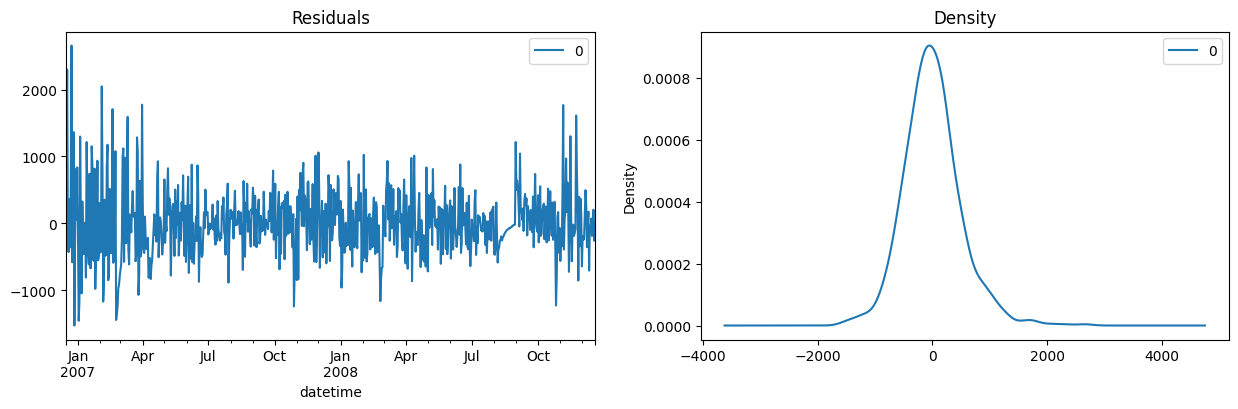

In [ ]:
residuals = pd.DataFrame(arima_result.resid)  # Creating DataFrame for residual errors
fig, ax = plt.subplots(1,2, figsize=(15,4))  # Creating subplots for residual plots
residuals.plot(title="Residuals", ax=ax[0])  # Plotting residual errors
residuals.plot(kind='kde', title='Density', ax=ax[1])  # Plotting density plot of residual errors
plt.show()  # Showing plots

In [ ]:
# Forecasting

In [ ]:
# Forecast

In [ ]:
forecast_values = []  # Initialize list to store forecasted values

In [ ]:
for i in range(len(test_data)):
    forecast = arima_result.forecast(steps=1)  # Forecast one step ahead
    forecast_values.append(forecast.iloc[0])  # Append forecasted value to list

In [ ]:
# Plot the forecast against the actual outcomes

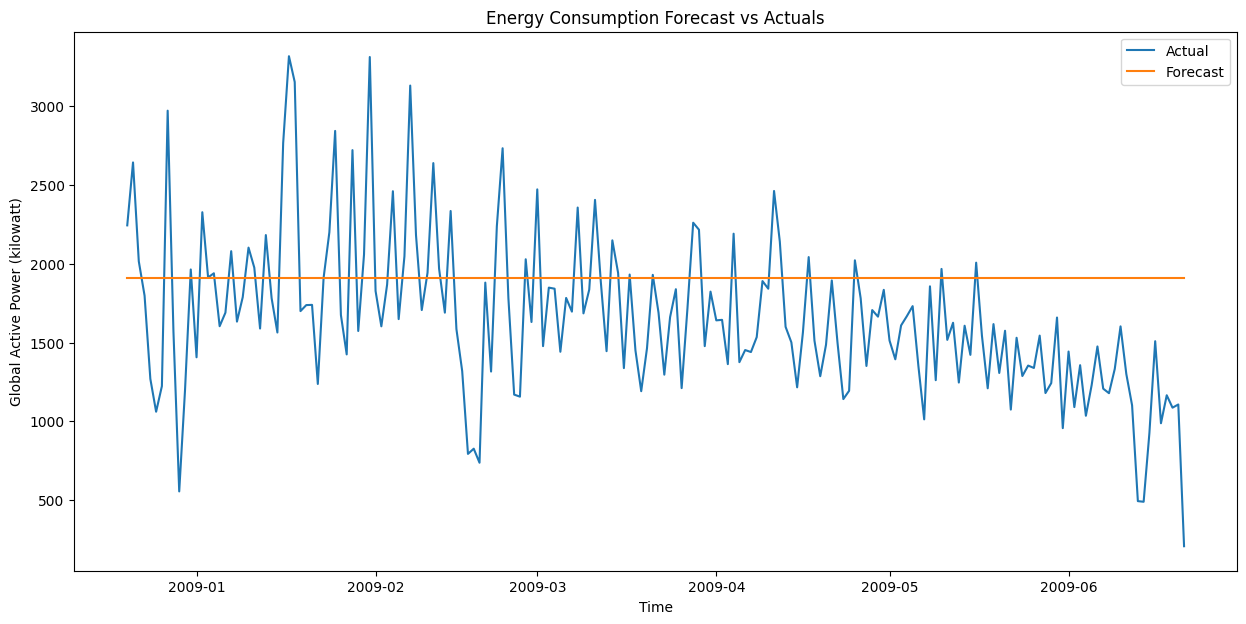

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(test_data.index, test_data['Global_active_power'], label='Actual')  # Plotting actual values
plt.plot(test_data.index, forecast_values, label='Forecast')  # Plotting forecasted values
plt.title('Energy Consumption Forecast vs Actuals')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatt)')
plt.legend()
plt.show()  # Showing plot

# Model Evaluation

In [ ]:
# Calculate mean squared error

In [ ]:
# Ensure forecast_values and test_data['Global_active_power'] have the same length

In [ ]:
if len(forecast_values) != len(test_data):
    print("Error: Length of forecast values does not match length of test data")
else:
    # Convert forecast_values to a NumPy array
    forecast_values_array = np.array(forecast_values)

    # Calculate mean squared error
    error = mean_squared_error(test_data['Global_active_power'], forecast_values_array)
    print('Test MSE: %.3f' % error)  # Printing mean squared error


Test MSE: 319610.284


In [ ]:
print('Test MSE: %.3f' % error)  # Printing mean squared error

Test MSE: 319610.284


# Model Improvement Strategies

In [ ]:
print("\nModel Improvement Strategies:")
print("1. Parameter Tuning: Use grid search to find the optimal ARIMA parameters (p, d, q).")
print("2. Seasonal ARIMA (SARIMA): If the data has seasonal patterns, use SARIMA to model both non-seasonal and seasonal elements.")
print("3. External Regressors: Include additional variables (e.g., temperature, day of the week) in the ARIMA model if they are significant predictors of energy consumption.")
print("4. Residual Analysis: Investigate the residuals for patterns that the model is not capturing.")
print("5. Cross-Validation: Implement time series cross-validation to assess the model's predictive performance more robustly.")



Model Improvement Strategies:
1. Parameter Tuning: Use grid search to find the optimal ARIMA parameters (p, d, q).
2. Seasonal ARIMA (SARIMA): If the data has seasonal patterns, use SARIMA to model both non-seasonal and seasonal elements.
3. External Regressors: Include additional variables (e.g., temperature, day of the week) in the ARIMA model if they are significant predictors of energy consumption.
4. Residual Analysis: Investigate the residuals for patterns that the model is not capturing.
5. Cross-Validation: Implement time series cross-validation to assess the model's predictive performance more robustly.


#Impactful Visualizations

In [ ]:
# Time Series Decomposition

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose  # Importing seasonal_decompose from statsmodels for time series decomposition  # Describe


In [ ]:
# Decompose the time series into trend, seasonality, and residual components

In [ ]:
decomposition = seasonal_decompose(daily_data['Global_active_power'], model='additive')  # Performing seasonal decomposition  # Describe


In [ ]:
# Plot the decomposed components

<Figure size 1400x700 with 0 Axes>

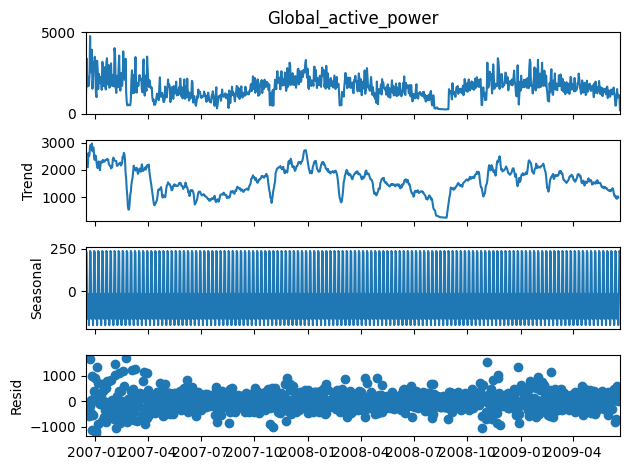

In [ ]:
plt.figure(figsize=(14,7))  # Setting the figure size  # Describe
decomposition.plot()  # Plotting the decomposed components  # Describe
plt.show()  # Showing the plot  # Describe

In [ ]:
# ACF and PACF Plots

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # Importing plot_acf and plot_pacf from statsmodels for autocorrelation plots  # Describe


In [ ]:
# Plot Autocorrelation Function (ACF)

<Figure size 1500x500 with 0 Axes>

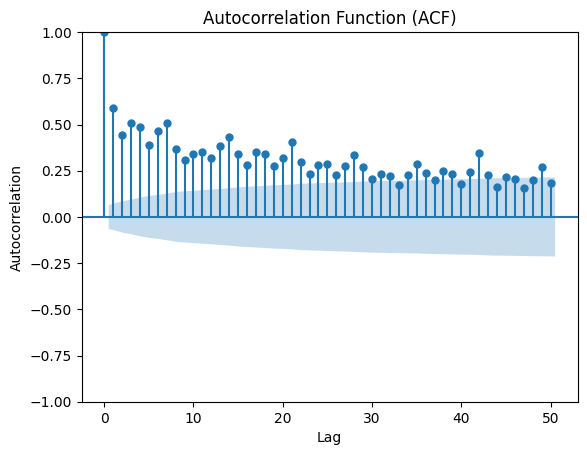

In [ ]:
plt.figure(figsize=(15, 5))  # Setting the figure size  # Describe
plot_acf(daily_data['Global_active_power'], lags=50)  # Plotting ACF with lag 50  # Describe
plt.xlabel('Lag')  # Setting x-axis label  # Describe
plt.ylabel('Autocorrelation')  # Setting y-axis label  # Describe
plt.title('Autocorrelation Function (ACF)')  # Setting title  # Describe
plt.show()  # Showing the plot  # Describe

In [ ]:
# Plot Partial Autocorrelation Function (PACF)

<Figure size 1500x500 with 0 Axes>

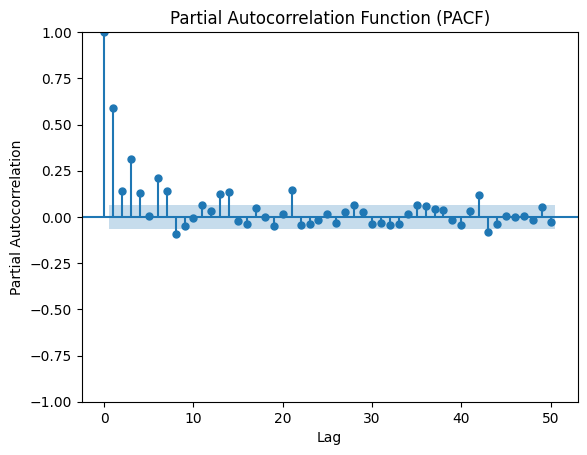

In [ ]:
plt.figure(figsize=(15, 5))  # Setting the figure size  # Describe
plot_pacf(daily_data['Global_active_power'], lags=50)  # Plotting PACF with lag 50  # Describe
plt.xlabel('Lag')  # Setting x-axis label  # Describe
plt.ylabel('Partial Autocorrelation')  # Setting y-axis label  # Describe
plt.title('Partial Autocorrelation Function (PACF)')  # Setting title  # Describe
plt.show()  # Showing the plot  # Describe